In [1]:
#importing necessary files
#import files
#load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from math import sqrt
import seaborn as sns

#import pandas_profiling as pf
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble

In [2]:
#!pip install imblearn

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
plt.style.use('fivethirtyeight')

In [4]:
# get prudential & test csv files as a DataFrame
df_all  = pd.read_csv('C:/Users/DEEPAK KUMAR/Desktop/Python Project/Preduntail life insurance/train.csv')
test_df        = pd.read_csv('C:/Users/DEEPAK KUMAR/Desktop/Python Project/Preduntail life insurance/test.csv')

In [5]:
# preview the data
df_all.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,3,3,240.0,3,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,1,1,3,2,2,1,NaN,3,2,3,3,0.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,2,2,3,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [6]:
df_all.info()
print("----------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19765 entries, 0 to 19764
Columns: 127 entries, Id to Medical_Keyword_48
dtypes: float64(18), int64(108), object(1)
memory usage: 19.2+ MB


In [7]:
df_all.shape

(59381, 128)

In [8]:
df_all.columns

Index(['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7',
       'Ins_Age', 'Ht',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Response'],
      dtype='object', length=128)

In [9]:
df_all['Response'].value_counts()

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

In [10]:
df_all.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59362.000000,59381.000000,59381.000000,52602.000000,59381.000000,48527.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,33985.000000,59381.000000,59381.000000,59381.000000,59381.000000,30725.000000,25140.000000,40197.000000,17570.000000,50492.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,557.000000,59381.000000,59381.000000,59381.000000,59381.000000,14785.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,3801.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,1107.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,0.077582

In [11]:
df_all.dtypes

Id                       int64
Product_Info_1           int64
Product_Info_2          object
Product_Info_3           int64
Product_Info_4         float64
Product_Info_5           int64
Product_Info_6           int64
Product_Info_7           int64
Ins_Age                float64
Ht                     float64
Wt                     float64
BMI                    float64
Employment_Info_1      float64
Employment_Info_2        int64
Employment_Info_3        int64
Employment_Info_4      float64
Employment_Info_5        int64
Employment_Info_6      float64
InsuredInfo_1            int64
InsuredInfo_2            int64
InsuredInfo_3            int64
InsuredInfo_4            int64
InsuredInfo_5            int64
InsuredInfo_6            int64
InsuredInfo_7            int64
Insurance_History_1      int64
Insurance_History_2      int64
Insurance_History_3      int64
Insurance_History_4      int64
Insurance_History_5    float64
Insurance_History_7      int64
Insurance_History_8      int64
Insuranc

Unique values in Target Variable: int64
Unique values in Target Variable: [8 4 1 6 2 7 3 5]
Total Number of unique values : 8


Text(0.5, 1.0, 'Distribution of rows by response categories')

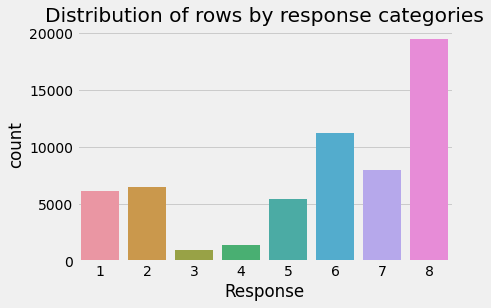

In [12]:
#print unique values of target variable
print("Unique values in Target Variable: {}".format(df_all.Response.dtype))
print("Unique values in Target Variable: {}".format(df_all.Response.unique()))
print("Total Number of unique values : {}".format(len(df_all.Response.unique())))

#distribution plot for target classes
sns.countplot(x=df_all.Response).set_title('Distribution of rows by response categories')

Unique values in Target Variable: int64
Unique values in Target Variable: [1 0]
Total Number of unique values : 2


Text(0.5, 1.0, 'Distribution of rows by response categories')

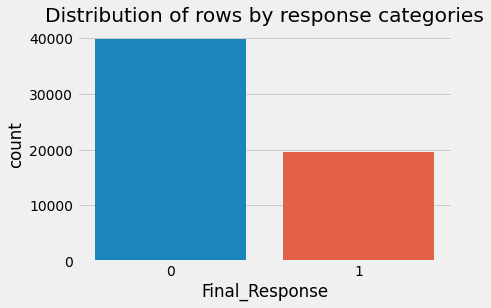

In [13]:
#create a funtion to createa  new target variable based on conditions

def new_target(row):
    if (row['Response']<=7) & (row['Response']>=0):
        val=0
    elif (row['Response']==8):
        val=1
    else:
        val=-1
    return val


#create a copy of original dataset
new_data=df_all.copy()

#create a new column
new_data['Final_Response']=new_data.apply(new_target,axis=1)


#print unique values of target variable
print("Unique values in Target Variable: {}".format(new_data.Final_Response.dtype))
print("Unique values in Target Variable: {}".format(new_data.Final_Response.unique()))
print("Total Number of unique values : {}".format(len(new_data.Final_Response.unique())))

#distribution plot for target classes
sns.countplot(x=new_data.Final_Response).set_title('Distribution of rows by response categories')

In [14]:
## We got two classes for response [0,1] and it is as per requirment.


In [15]:
#drop the actual response column
new_data.drop(axis=1,labels=['Response'],inplace=True)

#rename the "Final_Response" to "Response"
new_data.rename(columns={"Final_Response":"Response"},inplace=True)
#print the nw column names
print("New columns: ", new_data.columns)
X_original=df_all
df_all=new_data

New columns:  Index(['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7',
       'Ins_Age', 'Ht',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Response'],
      dtype='object', length=128)


<AxesSubplot:>

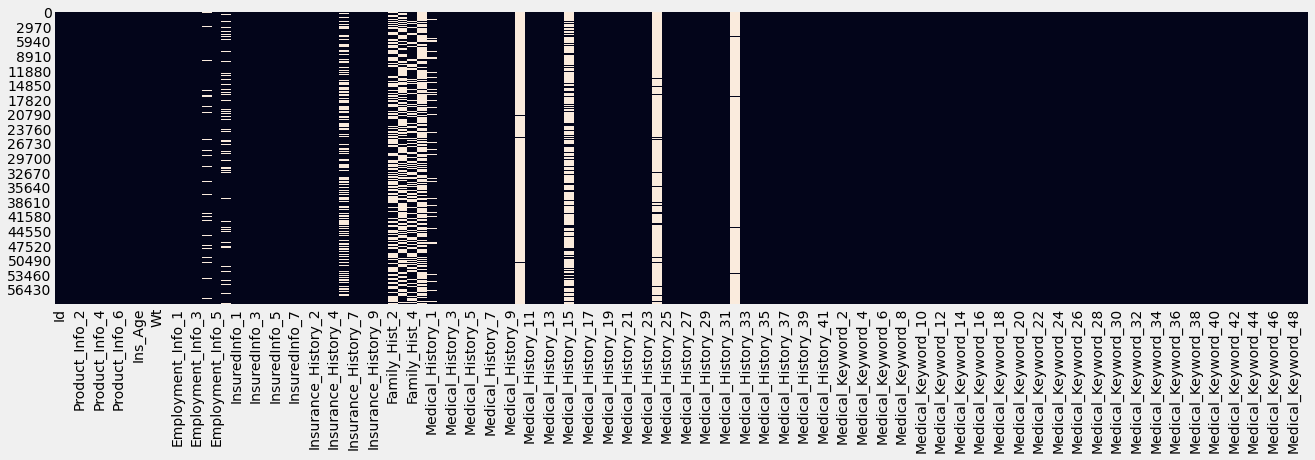

In [16]:
#Are there any columns with missing values?

fig, ax = plt.subplots(figsize=(20,5))  
sns.heatmap(df_all.isnull(), cbar=False)

In [17]:
missing_val_count_by_column = (df_all.isnull().sum()/len(df_all))
print(missing_val_count_by_column[missing_val_count_by_column>0.3].sort_values(ascending=False))

Medical_History_10     0.990620
Medical_History_32     0.981358
Medical_History_24     0.935990
Medical_History_15     0.751015
Family_Hist_5          0.704114
Family_Hist_3          0.576632
Family_Hist_2          0.482579
Insurance_History_5    0.427679
Family_Hist_4          0.323066
dtype: float64


### Observations from missing map and missing percentage:
1. Majority of columns dont have missing values
2. Target variable does not have any missing values
3. Few columns have few missing values, whereas few columns have too much missing values
4. Few medical history, FamilyHist* columns have more than 30% missing values.

In [18]:
# What are the diffrent datatypes available in datasource

columns_df=pd.DataFrame({'column_names':df_all.columns,'datatypes':df_all.dtypes},index=None)
x=columns_df.groupby(by=['datatypes']).count()
x.reset_index(inplace=True)
x.rename(columns={"column_names":"Number_of_columns"},inplace=True)
lst=[]
for data_type in x.datatypes:
    v=list(df_all.select_dtypes(include=data_type).columns)
    lst.append(v)
    x['Column_Names']=pd.Series(lst)
    

x

,datatypes,Number_of_columns,Column_Names
0,int64,109,"[Id, Product_Info_1, Product_Info_3, Product_I..."
1,float64,18,"[Product_Info_4, Ins_Age, Ht, Wt, BMI, Employm..."
2,object,1,[Product_Info_2]


In [19]:
#Lets look at only object column : [Product_Info_2]

#check the values in Product_info_ column
print("Total Unique Values: ", len(df_all['Product_Info_2'].unique()))
print("Unique values in 'Product_Info_2':", df_all['Product_Info_2'].unique())

Total Unique Values:  19
Unique values in 'Product_Info_2': ['D3' 'A1' 'E1' 'D4' 'D2' 'A8' 'A2' 'D1' 'A7' 'A6' 'A3' 'A5' 'C4' 'C1'
 'B2' 'C3' 'C2' 'A4' 'B1']


<AxesSubplot:>

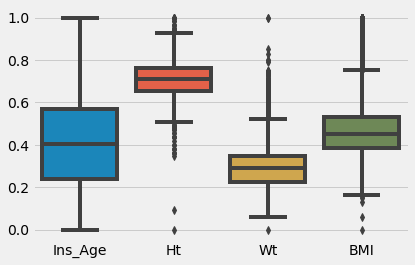

In [20]:
# Exploring Numerical variables
misc_cols=["Ins_Age","Ht","Wt","BMI"]

sns.boxplot(data=df_all[misc_cols])

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn import ensemble
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,accuracy_score,precision_score
from sklearn.model_selection import train_test_split

In [22]:
y = df_all.Response
X = df_all.drop(labels=['Response'],axis=1)

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=.30,random_state=1)

#create train and test dataset after dropping columns with null values and categorical column

#drop categorical column
X_dropped_train=X_train.drop(axis=1,labels=["Product_Info_2"]).copy()
X_dropped_valid=X_valid.drop(axis=1,labels=["Product_Info_2"]).copy()

#drop columns with any null
X_dropped_train.dropna(axis=1,inplace=True)
X_dropped_valid.dropna(axis=1,inplace=True)

# print shape of dataset
print("Shape of X_train dataset {}".format(X_dropped_train.shape))
print("Shape of X_test dataset {}".format(X_dropped_valid.shape))

print("Shape of y_train dataset {}".format(y_train.shape))
print("Shape of y_valid dataset {}".format(y_valid.shape))


Shape of X_train dataset (41566, 113)
Shape of X_test dataset (17815, 113)
Shape of y_train dataset (41566,)
Shape of y_valid dataset (17815,)


In [23]:
#set seed for same results everytime
seed=0

#declare the models
dt=DecisionTreeClassifier(random_state=seed)
rf=RandomForestClassifier(random_state=seed)
lr=LogisticRegression(random_state=seed)
adb=ensemble.AdaBoostClassifier()
bgc=ensemble.BaggingClassifier()
gbc=ensemble.GradientBoostingClassifier()
xgb=XGBClassifier(random_state=seed)
#sgdc=SGDClassifier(random_state=seed)
svc=SVC(random_state=seed)
#knn=KNeighborsClassifier()
#nb=GaussianNB()

#create a list of models
models=[dt,rf,lr,adb,bgc,gbc,svc,xgb]

def score_model(X_train,y_train,X_valid,y_valid):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0
    #read model one by one
    for model in models:
        model.fit(X_train,y_train)
        y_pred=model.predict(X_valid)
        
        #compute metrics
        train_accuracy=model.score(X_train,y_train)
        test_accuracy=model.score(X_valid,y_valid)
        
        p_score=metrics.precision_score(y_valid,y_pred)
        r_score=metrics.recall_score(y_valid,y_pred)
        f1_score=metrics.f1_score(y_valid,y_pred)
        fp, tp, th = metrics.roc_curve(y_valid, y_pred)
        
        #insert in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"Precision"]=round(p_score,2)
        df.loc[i,"Recall"]=round(r_score,2)
        df.loc[i,"Train_Accuracy"]=round(train_accuracy,2)
        df.loc[i,"Test_Accuracy"]=round(test_accuracy,2)
        df.loc[i,"F1_Score"]=round(f1_score,2)
        df.loc[i,'AUC'] = metrics.auc(fp, tp)
        
        i+=1
    
    #sort values by accuracy
    df.sort_values(by=['F1_Score'],ascending=False,inplace=True)
    return(df)

In [24]:
report_no_null=score_model(X_dropped_train,y_train,X_dropped_valid,y_valid)
report_no_null

C:\Users\DEEPAK KUMAR\.conda\envs\dsp_7\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DEEPAK KUMAR\.conda\envs\dsp_7\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DEEPAK KUMAR\.conda\envs\dsp_7\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will b

[21:34:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model_Name,Precision,Recall,Train_Accuracy,Test_Accuracy,F1_Score,AUC
7,XGBClassifier,0.73,0.75,0.88,0.83,0.74,0.806867
3,AdaBoostClassifier,0.71,0.76,0.82,0.82,0.73,0.803055
5,GradientBoostingClassifier,0.72,0.74,0.83,0.82,0.73,0.802169
1,RandomForestClassifier,0.74,0.70,1.00,0.82,0.72,0.792030
4,BaggingClassifier,0.72,0.66,0.99,0.80,0.69,0.766387
0,DecisionTreeClassifier,0.62,0.63,1.00,0.75,0.63,0.722643
2,LogisticRegression,0.60,0.43,0.72,0.72,0.50,0.646032
6,SVC,0.00,0.00,0.67,0.67,0.00,0.500000


In [25]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


## Observations after scoring 1st data set - No null & No object column
AdaBoostClassifier gives highest Recall
Highest precision is given by GradientBoostingClassifier
Highest AUC is given by GradientBoostingClassifier
## Dataset II:
We will prepare a new dataset with below operations performed:

Outlier Treatment for wt,bmi,Ht
Product_info_2 column encoded
Combining all the keywords into single columns
### Step1 : Remove Outliers based on IQR range¶

<AxesSubplot:xlabel='BMI', ylabel='Wt'>

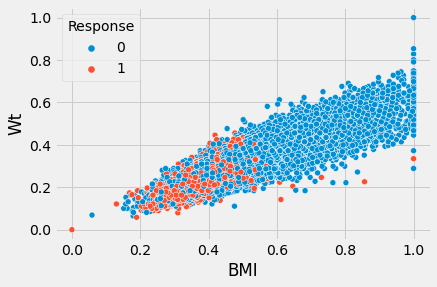

In [26]:
sns.scatterplot(data=df_all,x='BMI',y='Wt',hue='Response',alpha=1)

<AxesSubplot:xlabel='BMI', ylabel='Ins_Age'>

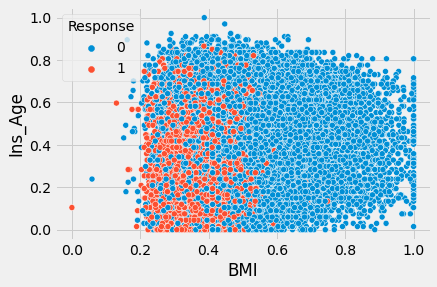

In [27]:
sns.scatterplot(data=df_all,x='BMI',y='Ins_Age',hue='Response',alpha=1)

<AxesSubplot:>

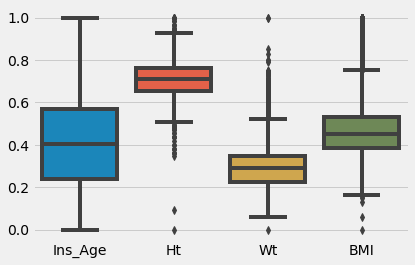

In [28]:
# Exploring Numerical variables for outliers
misc_cols=["Ins_Age","Ht","Wt","BMI"]

sns.boxplot(data=df_all[misc_cols])

In [29]:
#function to remove outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out


dev=remove_outlier(df_all,'BMI')
dev=remove_outlier(dev,'Wt')
dev=remove_outlier(dev,'Ht')

<AxesSubplot:>

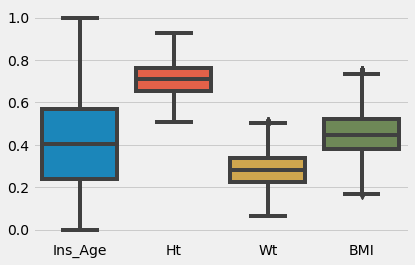

In [30]:
sns.boxplot(data=dev[misc_cols])

<AxesSubplot:xlabel='BMI', ylabel='Wt'>

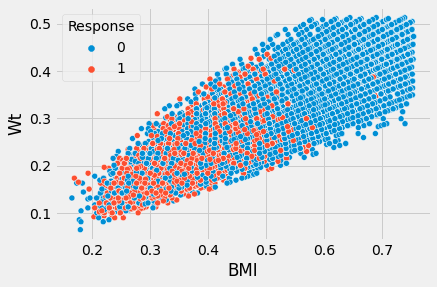

In [31]:
sns.scatterplot(data=dev,x='BMI',y='Wt',hue='Response',alpha=1)

### Step 2: Train Test Split¶


In [32]:
#prepare 3rd dataset
#identifying columns with more than 30% missing values and dropping them

y = dev.Response
X = dev.drop(labels=['Response'],axis=1)


# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=.30,random_state=1)

## Step 3: Remove columns with high missing value percentage**


In [33]:
#dropping the columns with more than 30% missing values
missing_val_count_by_column = (dev.isnull().sum()/len(dev))
print(missing_val_count_by_column[missing_val_count_by_column > 0.3])
cols_to_drop=missing_val_count_by_column[missing_val_count_by_column > 0.3].index.values

# Make copy to avoid changing original data 
out_enc_X_train = X_train.drop(labels=cols_to_drop,axis=1).copy()
out_enc_X_valid = X_valid.drop(labels=cols_to_drop,axis=1).copy()

Insurance_History_5    0.427007
Family_Hist_2          0.480592
Family_Hist_3          0.577492
Family_Hist_4          0.321319
Family_Hist_5          0.705535
Medical_History_10     0.990758
Medical_History_15     0.752110
Medical_History_24     0.936702
Medical_History_32     0.981237
dtype: float64


## Step 4: Combine all 'Medical_Keyword_X' into 'Total_Medkwrds' and 'Medical_History_X' into 'Total MedHist'**

In [34]:
"""import numpy as np
#identify all cols with medical keywords
medical_cols=[col for col in out_enc_X_train.columns if str(col).startswith("Medical_History")]

out_enc_X_train['Total_MedKwrds']=out_enc_X_train['medical_keyword_cols'].sum(axis=1)
out_enc_X_train['Total_MedHist']=out_enc_X_train[medical_cols].sum(axis=1)

out_enc_X_valid['Total_MedKwrds']=out_enc_X_valid['medical_keyword_cols'].sum(axis=1)
out_enc_X_valid['Total_MedHist']=out_enc_X_valid[medical_cols].sum(axis=1)
"""

'import numpy as np\n#identify all cols with medical keywords\nmedical_cols=[col for col in out_enc_X_train.columns if str(col).startswith("Medical_History")]\n\nout_enc_X_train[\'Total_MedKwrds\']=out_enc_X_train[\'medical_keyword_cols\'].sum(axis=1)\nout_enc_X_train[\'Total_MedHist\']=out_enc_X_train[medical_cols].sum(axis=1)\n\nout_enc_X_valid[\'Total_MedKwrds\']=out_enc_X_valid[\'medical_keyword_cols\'].sum(axis=1)\nout_enc_X_valid[\'Total_MedHist\']=out_enc_X_valid[medical_cols].sum(axis=1)\n'

## Step 5: Perform label encoding and imputation

In [35]:
#label encoding 
le=LabelEncoder()
out_enc_X_train['Product_Info_2_en'] = le.fit_transform(out_enc_X_train['Product_Info_2'])
out_enc_X_valid['Product_Info_2_en'] = le.fit_transform(out_enc_X_valid['Product_Info_2'])

out_enc_X_train.drop(axis=1,labels=['Product_Info_2'],inplace=True)
out_enc_X_valid.drop(axis=1,labels=['Product_Info_2'],inplace=True)

# imputing missing values
imputer=SimpleImputer()

out_enc_X_train= imputer.fit_transform(out_enc_X_train)
out_enc_X_valid= imputer.transform(out_enc_X_valid)

## Step 6: Build a Random Forest model

In [36]:
#Rename the datasets

X_train=out_enc_X_train
y_train=y_train
X_valid=out_enc_X_valid
y_valid=y_valid

#instantiate, fit and make preditions
model=RandomForestClassifier(random_state=seed)
model.fit(X_train,y_train)
y_pred=model.predict(X_valid)

#compute metrics
train_accuracy=model.score(X_train,y_train)
test_accuracy=model.score(X_valid,y_valid)
p_score=metrics.precision_score(y_valid,y_pred)
r_score=metrics.recall_score(y_valid,y_pred)
f1_score=metrics.f1_score(y_valid,y_pred)
fp, tp, th = metrics.roc_curve(y_valid, y_pred)
auc = metrics.auc(fp, tp)

In [37]:
print("Train Accuracy: {}".format(round(train_accuracy,3)))
print("Test Accuracy: {}".format(round(test_accuracy,3)))
print("Precision Score: {}".format(round(p_score,3)))
print("Recall Score: {}".format(round(r_score,3)))
print("F1 Score: {}".format(round(f1_score,3)))
print("AUC: {}".format(round(auc,3)))

print("==============Classification Report=============================")
print(metrics.classification_report(y_valid,y_pred))


print("==============Confusion Matrix=============================")
print(metrics.confusion_matrix(y_valid,y_pred))

Train Accuracy: 1.0
Test Accuracy: 0.819
Precision Score: 0.746
Recall Score: 0.709
F1 Score: 0.727
AUC: 0.792
==============Classification Report=============================
              precision    recall  f1-score   support

           0       0.85      0.88      0.86     11352
           1       0.75      0.71      0.73      5853

    accuracy                           0.82     17205
   macro avg       0.80      0.79      0.80     17205
weighted avg       0.82      0.82      0.82     17205

==============Confusion Matrix=============================
[[9940 1412]
 [1702 4151]]


[Text(0, 0.5, 'Declined'), Text(0, 1.5, 'Approved')]

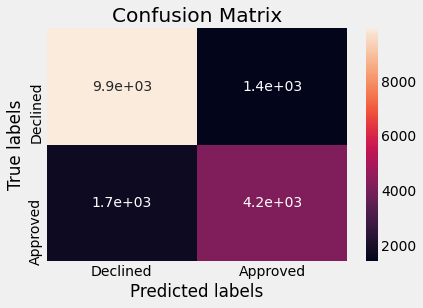

In [38]:
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_valid,y_pred),annot=True, ax = ax,); #annot=True to annotate cells

#  labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Declined', 'Approved'])
ax.yaxis.set_ticklabels(['Declined', 'Approved'])

## Our Random forest is overfitting, as a next step will tune the hyper parameters

In [39]:
# Look at parameters used by our current forest
from pprint import pprint
pprint('Parameters currently in use:\n')
pprint(model.get_params())

'Parameters currently in use:\n'
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


## Basic definitions of the hyperparameters:
1. n_estimators = number of trees in the foreset
2. max_features = max number of features considered for splitting a node
3. max_depth = max number of levels in each decision tree
4. min_samples_split = min number of data points placed in a node before the node is split
5. min_samples_leaf = min number of data points allowed in a leaf node
6. bootstrap = method for sampling data points (with or without replacement).Whether bootstrap samples are used when building trees. If False, the whole datset is used to build each tree.
7. classweight=Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.
8. criterion= The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific
9. n_jobs= Number of jobs to run in parallel
10. OOb_score= Whether to use out-of-bag samples to estimate the generalization accuracy.
11. Random_state= seed value
12. Warm_start=When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest
13. min_weight_fraction_leaf=The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
14. min_impurity_split = Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf
15. min_impurity_decrease = A node will be split if this split induces a decrease of the impurity greater than or equal to this value
16. max_leaf_nodes=Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.


##  Step 6: Build a Suport Vector Classifier

In [40]:
from sklearn.svm import SVC

#instantiate, fit and make preditions
model=SVC()
model.fit(X_train,y_train)
y_pred=model.predict(X_valid)

#compute metrics
train_accuracy=model.score(X_train,y_train)
test_accuracy=model.score(X_valid,y_valid)
p_score=metrics.precision_score(y_valid,y_pred)
r_score=metrics.recall_score(y_valid,y_pred)
f1_score=metrics.f1_score(y_valid,y_pred)
fp, tp, th = metrics.roc_curve(y_valid, y_pred)
auc = metrics.auc(fp, tp)

C:\Users\DEEPAK KUMAR\.conda\envs\dsp_7\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
print("Train Accuracy: {}".format(round(train_accuracy,3)))
print("Test Accuracy: {}".format(round(test_accuracy,3)))
print("Precision Score: {}".format(round(p_score,3)))
print("Recall Score: {}".format(round(r_score,3)))
print("F1 Score: {}".format(round(f1_score,3)))
print("AUC: {}".format(round(auc,3)))

print("==============Classification Report=============================")
print(metrics.classification_report(y_valid,y_pred))


print("==============Confusion Matrix=============================")
print(metrics.confusion_matrix(y_valid,y_pred))

C:\Users\DEEPAK KUMAR\.conda\envs\dsp_7\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DEEPAK KUMAR\.conda\envs\dsp_7\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DEEPAK KUMAR\.conda\envs\dsp_7\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Accuracy: 0.661
Test Accuracy: 0.66
Precision Score: 0.0
Recall Score: 0.0
F1 Score: 0.0
AUC: 0.5
==============Classification Report=============================
              precision    recall  f1-score   support

           0       0.66      1.00      0.80     11352
           1       0.00      0.00      0.00      5853

    accuracy                           0.66     17205
   macro avg       0.33      0.50      0.40     17205
weighted avg       0.44      0.66      0.52     17205

==============Confusion Matrix=============================
[[11352     0]
 [ 5853     0]]


[Text(0, 0.5, 'Declined'), Text(0, 1.5, 'Approved')]

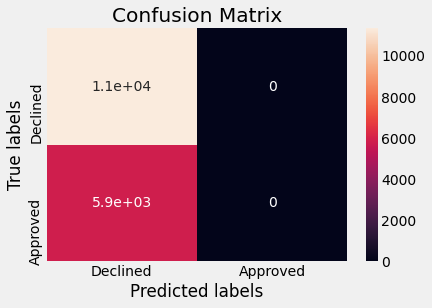

In [42]:
ax= plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_valid,y_pred),annot=True, ax = ax,); #annot=True to annotate cells

#  labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Declined', 'Approved'])
ax.yaxis.set_ticklabels(['Declined', 'Approved'])

## Step 7: KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#instantiate, fit and make preditions
model=KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_valid)

#compute metrics
train_accuracy=model.score(X_train,y_train)
test_accuracy=model.score(X_valid,y_valid)
p_score=metrics.precision_score(y_valid,y_pred)
r_score=metrics.recall_score(y_valid,y_pred)
f1_score=metrics.f1_score(y_valid,y_pred)
fp, tp, th = metrics.roc_curve(y_valid, y_pred)
auc = metrics.auc(fp, tp)

In [ ]:
print("Train Accuracy: {}".format(round(train_accuracy,3)))
print("Test Accuracy: {}".format(round(test_accuracy,3)))
print("Precision Score: {}".format(round(p_score,3)))
print("Recall Score: {}".format(round(r_score,3)))
print("F1 Score: {}".format(round(f1_score,3)))
print("AUC: {}".format(round(auc,3)))

print("==============Classification Report=============================")
print(metrics.classification_report(y_valid,y_pred))


print("==============Confusion Matrix=============================")
print(metrics.confusion_matrix(y_valid,y_pred))

In [ ]:
ax= plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_valid,y_pred),annot=True, ax = ax,); #annot=True to annotate cells

#  labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Declined', 'Approved'])
ax.yaxis.set_ticklabels(['Declined', 'Approved'])